<a href="https://colab.research.google.com/github/honghusldl/capstone-project-city-segmentation/blob/main/Introduction_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction:

Backgroud: Asian cuisine has been popular in Toronto for consumers. Specifically, Chinese cuisine has multiple traditions that are not completely introduced in Canada. The Eight Cuisines of China are Anhui, Guangdong, Fujian, Hunan, Jiangsu, Shandong, Sichuan, and Zhejiang cuisines. They have distinct but pleasant characteristics among entries, drinks and desserts. Therefore, it would be attractive to open up a new Chinese restaurant that provides one of the subtype of the Chinese cuisine. Besides, most Chinese restaurant in Canada are either hotpot or Yue. Having more and more options would also help the business to attract more consumers with their specialties.

The aim of this project is to find the best neighborhood in Toronto to open a new Chinese restaurant. In this project, we will utilize FourSquare API to retrieve location data and also explore venues in Toronto. We will analyze the neighborhoods by two types of clustering. Type I is clustering neighborhoods by speicific one venue category, Chinese restaurant, whereas Type II is clustering neighborhoods by all venue cateogories. Considering business people may make their decisions from different angle, I provide two means here. Type I clustering (Chinese restaurant only) focuses on competitive strength from Chinese restaurant specifically, while Type II clustering (all venues) emphasizes competition between all businesses.

## Data Description:

1: Basic Toronto data including Toronto's borough, neighborhoods, postal codes data from Wikipedia.
Data sources: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

Example of the data

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
toronto_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html_data = requests.get(toronto_url).text
toronto_soup = BeautifulSoup(html_data)

# extract postalcode, borough and neighborhood from the table in the page
# create a list containing dictinoary with 3 keys
toronto_info = []
table = toronto_soup.find('table')
for row in table.findAll('td'):
  cell={}
  if row.span.text=='Not assigned':
    pass
  else:
    cell['PostalCode']=row.p.text[:3]
    cell['Borough']=(row.span.text).split('(')[0]
    cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
    toronto_info.append(cell)

# create a dataframe containing all neighborhood information
df = pd.DataFrame(toronto_info)

# replace names in borough
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


2: Geospatial data for Toronto's postal codes.
Data sources:https://cocl.us/Geospatial_data. Data is retrieved by Geocoder package.

Example of the data

In [4]:
df_coord = pd.read_csv('https://cocl.us/Geospatial_data')
df_coord.columns=['PostalCode','Latitude','Longitude']
df_coord.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


3: Toronto's venues data including venue name, venue geospatial information (latitude and longitude) and venue categories.
Data is retrieved by FourSquare API with personal credentials.

Example of the venues data

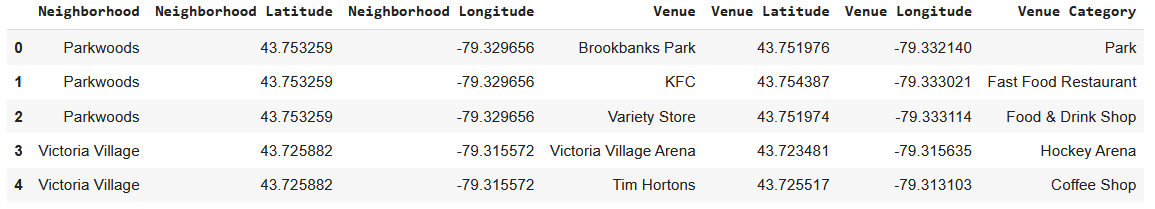